# Boston House Pricing

## Linear Regression Implementagion - Krish Naik

https://www.youtube.com/watch?v=MJ1vWb1rGwM&list=PLZoTAELRMXVMdvxeSuliQZcRLu3WCYVim

https://lib.stat.cmu.edu/datasets/boston

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target_feature = ['MEDV']

## Preparing the Dataset

In [3]:
dataset = pd.DataFrame(data, columns=data_features)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
dataset['Price'] = target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
# Summarizing the stats of the data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Checking the missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [8]:
# Exploratory Data Analysis
# Correlation
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [9]:
import seaborn as sns
#sns.pairplot(dataset)

Text(0, 0.5, 'Price')

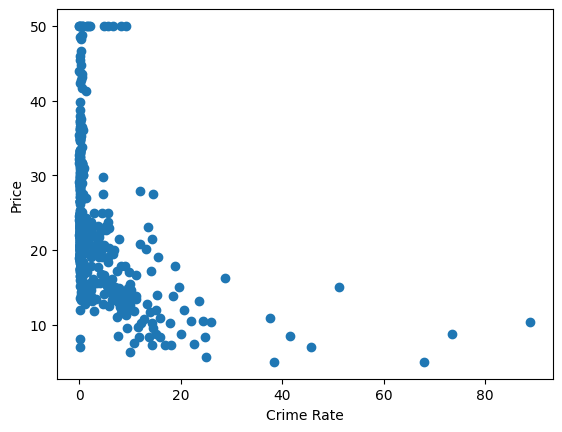

In [10]:
plt.scatter(dataset['CRIM'], dataset['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

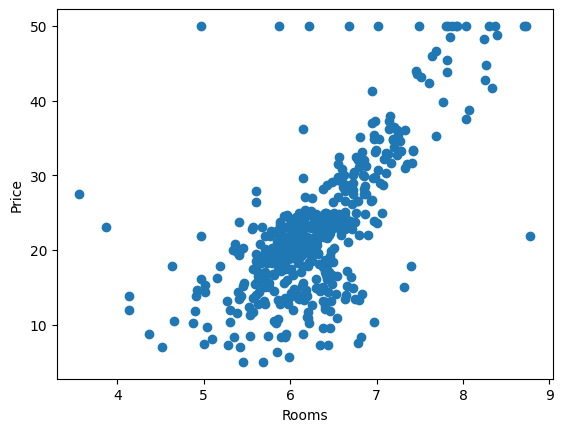

In [11]:
plt.scatter(dataset['RM'], dataset['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')

<Axes: xlabel='RM', ylabel='Price'>

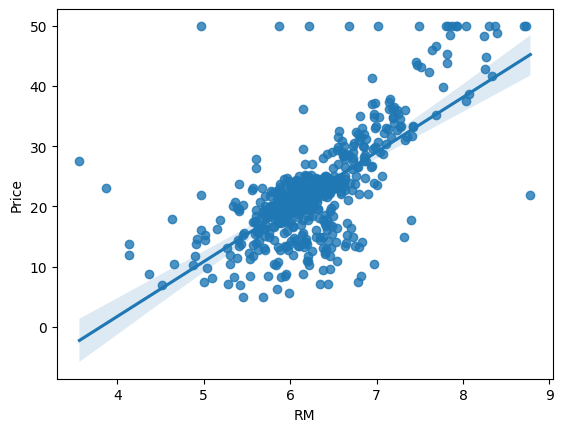

In [12]:
sns.regplot(x='RM', y='Price', data=dataset)

<Axes: xlabel='LSTAT', ylabel='Price'>

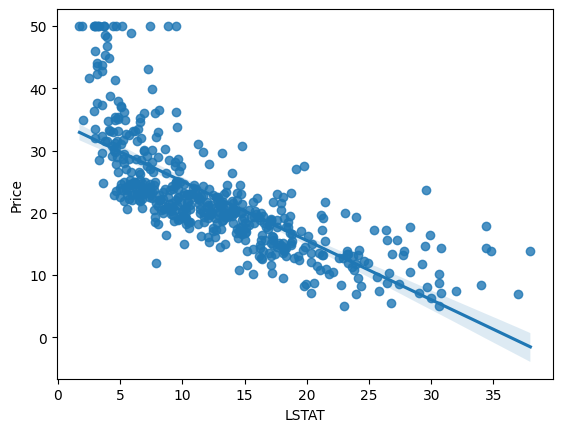

In [13]:
sns.regplot(x='LSTAT', y='Price', data=dataset)

<Axes: xlabel='CHAS', ylabel='Price'>

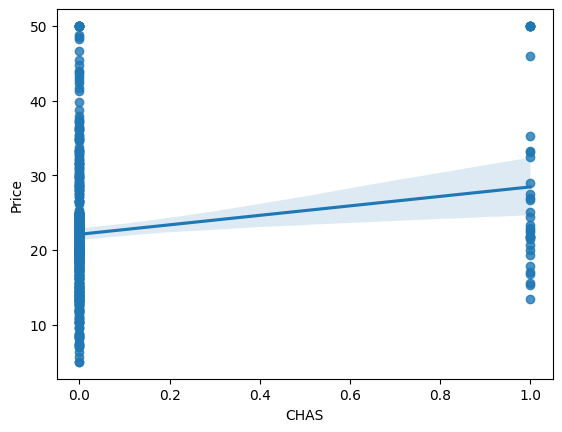

In [14]:
sns.regplot(x='CHAS', y='Price', data=dataset)

<Axes: xlabel='PTRATIO', ylabel='Price'>

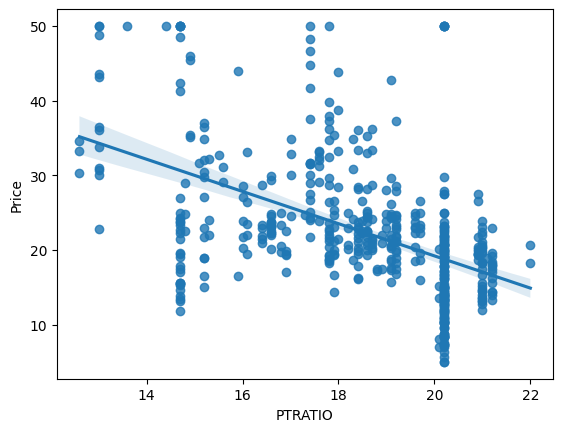

In [15]:
sns.regplot(x='PTRATIO', y='Price', data=dataset)

In [16]:
# Independent and Dependent Features

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1] 

In [17]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

### Padronização


Padronizar os dados antes de aplicar um modelo de regressão pode ser benéfico por várias razões, e sua relevância está diretamente relacionada ao uso de algoritmos de otimização, como o gradiente descendente. Aqui estão algumas razões pelas quais a padronização dos dados é comum antes de aplicar modelos de regressão:

1.  **Facilidade de Convergência:** O gradiente descendente é um algoritmo de otimização que pode convergir mais rapidamente quando os dados estão na mesma escala. Se as características do conjunto de dados tiverem escalas muito diferentes, pode levar mais tempo para que o algoritmo de gradiente descendente alcance a convergência. Padronizar os dados para ter uma média de zero e desvio padrão de um ajuda a tornar as características comparáveis e pode facilitar a convergência mais rápida do algoritmo.

2. **Regularização:** Algoritmos de regularização, como a Regressão Ridge e a Regressão Lasso, são sensíveis à escala dos dados. Se as características tiverem escalas muito diferentes, a regularização pode ser mais influenciada por algumas características do que por outras. Padronizar os dados garante que todas as características contribuam de forma equitativa para a função de custo, independentemente de suas escalas originais.

3. **Interpretação dos Coeficientes:** Quando os dados estão em diferentes escalas, os coeficientes resultantes do modelo de regressão também podem estar em escalas diferentes. Isso pode dificultar a interpretação dos coeficientes e a comparação da importância relativa das características. Padronizar os dados garante que os coeficientes estejam na mesma escala, facilitando a interpretação.

4. **Redução do Viés:** A padronização dos dados pode ajudar a reduzir o viés introduzido por características com escalas muito diferentes. Isso pode resultar em um modelo de regressão mais equilibrado e mais capaz de capturar as relações nos dados de forma geral.

Em resumo, padronizar os dados antes de aplicar um modelo de regressão ajuda a garantir uma convergência mais rápida, facilita a interpretação dos coeficientes, reduz o viés introduzido por características com escalas diferentes e pode melhorar o desempenho geral do modelo. Isso é particularmente relevante para algoritmos de otimização, como o gradiente descendente, que são sensíveis à escala dos dados.

In [19]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

Na classe StandardScaler do scikit-learn, o método fit_transform() é usado para ajustar (fit) o scaler aos dados de treinamento e, em seguida, transformá-los, ao mesmo tempo. Isso significa que ele calcula a média e o desvio padrão dos dados de treinamento e, em seguida, aplica a transformação para centralizar e escalar os dados durante o treinamento.

No entanto, nos dados de teste, já temos a média e o desvio padrão calculados a partir dos dados de treinamento. Portanto, não precisamos ajustar o scaler novamente aos dados de teste. Em vez disso, aplicamos a mesma transformação que foi aprendida com os dados de treinamento diretamente aos dados de teste usando o método transform().

Isso garante que a escala dos dados de teste seja consistente com a dos dados de treinamento, o que é fundamental para que o modelo faça previsões precisas. Se você usasse fit_transform() nos dados de teste, estaria recalculando a média e o desvio padrão com base apenas nos dados de teste, o que pode levar a uma escala diferente e, consequentemente, a previsões incorretas. Portanto, para manter a consistência, aplicamos apenas a transformação aos dados de teste usando o método transform().

## Model Training

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regression = LinearRegression()

In [24]:
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# print the coefficients and the intercept
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [26]:
print(regression.intercept_)

23.01581920903955


In [27]:
# on wich parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [28]:
# Prediction with Test Data
reg_pred = regression.predict(X_test)

In [29]:
len(reg_pred)

152

In [30]:
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [31]:
df = pd.DataFrame(y_test).rename(columns={'Price': 'y_test'}).reset_index(drop=True)
df['reg_pred'] = reg_pred.round(1)
df

,y_test,reg_pred
0,23.6,28.6
1,32.4,36.5
2,13.6,15.4
3,22.8,25.4
4,16.1,18.9
...,...,...
147,17.1,17.4
148,14.5,13.4
149,50.0,40.0
150,14.3,16.7


### Assumptions

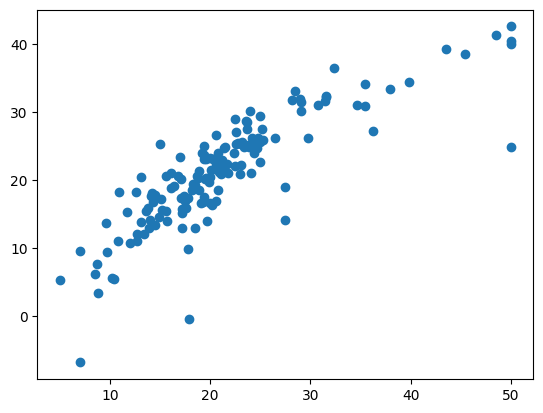

In [32]:
# plot a scatter plot for a prediction
plt.scatter(y_test, reg_pred)

In [33]:
# Residuals
residuals = y_test - reg_pred

In [34]:
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: Price, Length: 152, dtype: float64

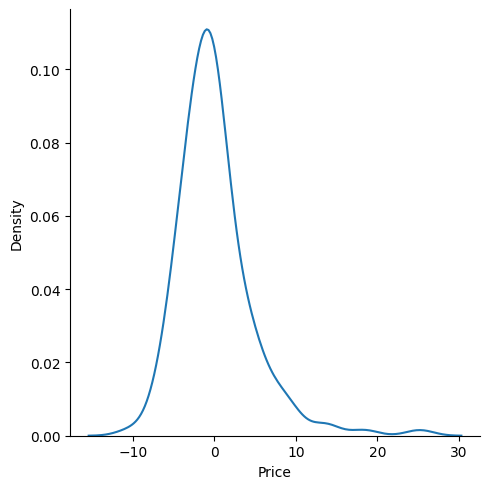

In [35]:
# Plot this residuals
sns.displot(residuals, kind='kde')

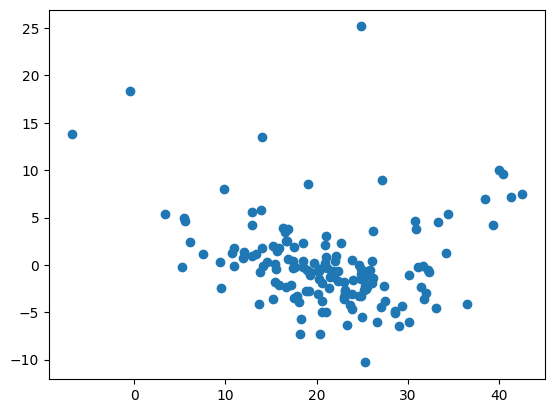

In [36]:
# Scatter plot wiht respect to prediction and residuals
# uniform distribuition ok
plt.scatter(reg_pred, residuals)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

3.1627098714574053
21.51744423117721
4.6386899261728205


### R square and adjusted R square

In [38]:
# R square and adjusted R square
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.7112260057484932


## New Data Prediction

In [39]:
# Como exemplo, pegamos o primeiro registro do dataset original
data[0].shape

(13,)

In [40]:
data[0].reshape(-1,1).shape

(13, 1)

In [41]:
# 13 colunas, dessa forma que devo remodelar meus novos dados
data[0].reshape(1,-1).shape

(1, 13)

In [42]:
# Obteve um valor negativo e discrepante, porque esses dados não foram padronizados
regression.predict(data[0].reshape(1,-1))

array([-45.64344024])

In [43]:
# Padronizando novos dados
# Transformation of new data
scaler.transform(data[0].reshape(1,-1))

/home/dof/DSProjects/Boston-House-Pricing-KrishNaik/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [44]:
regression.predict(scaler.transform(data[0].reshape(1,-1)))

/home/dof/DSProjects/Boston-House-Pricing-KrishNaik/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

In [45]:
target[0]

24.0

## Pickling the Model File for Deployment

In [47]:
import pickle

In [48]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [49]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [50]:
pickled_model.predict(scaler.transform(data[0].reshape(1,-1)))

/home/dof/DSProjects/Boston-House-Pricing-KrishNaik/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])